Team 4 Unsupervised learning team members: 
Charles Maponya, 
Chuene Mokgokong,
Kgomotso Moepe,
Lesedi, 
Thabisile Obi 

[Trello board ](https://trello.com/b/dVQJqi5C/team4unsupervised)

## Problem Statement 
problem statement to be added here 

![image.png](https://manofmany.com/wp-content/uploads/2020/04/Veboli-new-2.jpg)

## Start Comet experiment

# Table of contents

### [1. Introduction](#introduction)


### [2. Prepocessing](#prep)


### [3. Exploratory Data Analysis](#eda)



### [4. Modelling](#mod)



### [5. Conclusion](#conc)


## Introduction

Recommender systems are systems that are designed to recommend things to the user based on many different factors. These systems predict the most likely product that the user is most likely to purchase and are of interest. Companies like Netflix and Amazon use recommender systems to help their users to identify the correct product or movies for them.

Recommender systems are an important class of machine learning algorithms that offer relevant suggestions to users. The suggested items are as relevant to the user as possible so that the user can engage with those items: YouTube videos, news articles, online products, movie and series recommendation.

Items are ranked according to their relevancy, and the most relevant ones are shown to the user. The relevance is determined by the recommender system, mainly based on historical data. For example, If you've recently watched YouTube videos about elephants, then YouTube is going to start showing you many elephant videos with similar titles and themes. 
Recommender systems are generally divided into two main categories: collaborative filtering and content-based systems.

![image.png](https://miro.medium.com/max/690/1*G4h4fOX6bCJhdmbsXDL0PA.png)
 
Both users and service providers have benefited from these kinds of systems. Intelligent algorithms can help viewers find great titles from tens of thousands of options. This notebook will construct a recommendation algorithm based on content and collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historic preferences.

Providing an accurate and robust solution will have immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

## Import libraries and datasets 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import surprise
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
import time
from surprise import SVD
from surprise import accuracy
import re
import plotly.express as px
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

/kaggle/input/edsa-recommender-system-predict/sample_submission.csv
/kaggle/input/edsa-recommender-system-predict/movies.csv
/kaggle/input/edsa-recommender-system-predict/imdb_data.csv
/kaggle/input/edsa-recommender-system-predict/genome_tags.csv
/kaggle/input/edsa-recommender-system-predict/genome_scores.csv
/kaggle/input/edsa-recommender-system-predict/train.csv
/kaggle/input/edsa-recommender-system-predict/test.csv
/kaggle/input/edsa-recommender-system-predict/tags.csv
/kaggle/input/edsa-recommender-system-predict/links.csv


In [2]:
#import datasets
data_folder = '/kaggle/input/edsa-recommender-system-predict/'
#data_folder = 'C:/Users/ADMIN/Desktop/unsupervised_project/'
train_df = pd.read_csv(data_folder + 'train.csv')
test_df = pd.read_csv(data_folder + 'test.csv')
tags_df = pd.read_csv(data_folder + 'tags.csv')
movies_df = pd.read_csv(data_folder + 'movies.csv')
links_df = pd.read_csv(data_folder + 'links.csv')
imdb_df = pd.read_csv(data_folder + 'imdb_data.csv')
genome_tags = pd.read_csv(data_folder + 'genome_tags.csv')
genome_score = pd.read_csv(data_folder + 'genome_scores.csv')

### [2. Preprocessing](#prep)

### [3. Exploratory Data Analysis](#eda)

In [3]:
len(train_df)

10000038

In [4]:
# To find the number of times a user rated a movie, we create a data frame with the count by userId
train_user = pd.DataFrame(
    train_df['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()


,userId,count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


### Visualizing common users

In [5]:
# Grouping the users within a certain range aided us in determining the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [6]:
# To give us insight in the spread, we used figures to determine the spread.
trial_error = np.array([['group_one', group_one,
                         'ratings_count between 1 and 50'],
                        ['group_two', group_two,
                         'ratings_count between 50 and 500'],
                        ['group_three', group_three,
                         'ratings_count between 500 and 1000'],
                        ['group_four', group_four,
                         'ratings_count between 1000 and 1500'],
                        ['group_five', group_five,
                         'ratings_count greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.show()
trial_error_df


,group,userId_grouping,explanation
0,group_one,110010,ratings_count between 1 and 50
1,group_two,50973,ratings_count between 50 and 500
2,group_three,1338,ratings_count between 500 and 1000
3,group_four,159,ratings_count between 1000 and 1500
4,group_five,61,ratings_count greater than 1500


### Visualizing the dataframes

In [7]:
# Created a Data Frame outlining the size of our data
dataframes = ['train_df', 'test_df', 'tags_df', 'imdb_df',
              'links_df', 'movies_df', 'genome_tags', 'genome_score']
sizes = [len(train_df), len(test_df), len(tags_df),
         len(imdb_df), len(links_df), len(movies_df),
         len(genome_tags), len(genome_score)]
total_size_df = pd.DataFrame(list(zip(dataframes, sizes)),
                             columns=['dataframe', 'sizes'])
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,imdb_df,27278
4,links_df,62423
5,movies_df,62423
6,genome_tags,1128
7,genome_score,15584448


In [8]:
new_row = {'dataframe': 'other', 'sizes': 180530}
total_size_df = total_size_df.append(new_row,
                                     ignore_index=True)
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,imdb_df,27278
4,links_df,62423
5,movies_df,62423
6,genome_tags,1128
7,genome_score,15584448
8,other,180530


In [9]:
total_size_df = total_size_df[total_size_df['sizes'] > 100000]
total_size_df

,dataframe,sizes
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
7,genome_score,15584448
8,other,180530


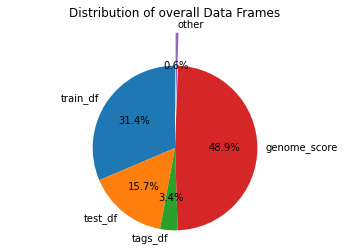

In [10]:
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.4)
fig1, ax1 = plt.subplots()
ax1.pie(total_size_df['sizes'].values,
        labels=total_size_df['dataframe'].values,
        startangle=90, autopct='%1.1f%%',
        explode=explodeTuple)
ax1.axis('equal')
plt.title('Distribution of overall Data Frames')
plt.show()

In [11]:
len_list = [['train_df', len(train_df)], ['tags_df', len(tags_df)],
            ['imdb_df', len(imdb_df)], ['links_df', len(links_df)],
            ['movies_df', len(movies_df)],
            ['genome_tags', len(genome_tags)],
            ['genome_score', len(genome_score)]]
len_df = pd.DataFrame(len_list,
                      columns=['Dataset', 'Size'])
fig = px.bar(len_df, x=len_df['Dataset'],
             y=len_df['Size'],
             color=len_df['Dataset'],
             title='Distribution of overall Data Frames')
fig.show()


### Visualizing the null values for each dataframe

In [12]:
# Obtaining the total null values in each Data Frames columns
train_count = pd.DataFrame(train_df.isnull().sum())
test_count = pd.DataFrame(test_df.isnull().sum())
tags_count = pd.DataFrame(tags_df.isnull().sum())
movies_count = pd.DataFrame(movies_df.isnull().sum())
links_count = pd.DataFrame(links_df.isnull().sum())
imdb_count = pd.DataFrame(imdb_df.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

In [13]:
train_count

,0
userId,0
movieId,0
rating,0
timestamp,0


In [14]:
test_count

,0
userId,0
movieId,0


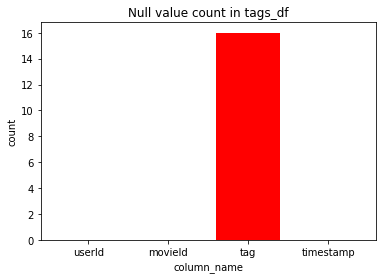

,userId,movieId,tag,timestamp
860902,121710,33826,NaN,1221450908
976395,141727,123,NaN,1199450867
976396,141727,346,NaN,1199451946
976400,141727,1184,NaN,1199452261
976407,141727,1785,NaN,1199452006
976408,141727,2194,NaN,1199450677
976410,141727,2691,NaN,1199451002
976418,141727,4103,NaN,1199451920
976420,141727,4473,NaN,1199451040
976422,141727,4616,NaN,1199452441


In [15]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='red')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in tags_df')
plt.show()
tags_df[tags_df.isnull().any(axis=1)]

In [16]:
movies_count

,0
movieId,0
title,0
genres,0


In [17]:
links_count

,0
movieId,0
imdbId,0
tmdbId,107


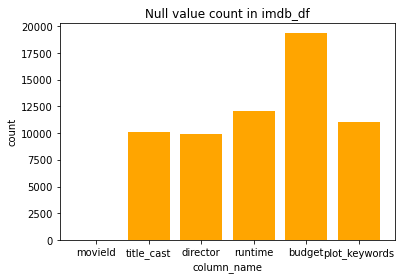

In [18]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='orange')
plt.xlabel('column_name')
plt.ylabel('count')
plt.title('Null value count in imdb_df')
plt.show()

In [19]:
genomet_count

,0
tagId,0
tag,0


In [20]:
genomes_count

,0
movieId,0
tagId,0
relevance,0


### Exploring Movie Genres

In [21]:
genres = pd.DataFrame(movies_df['genres'].
                      str.split("|").
                      tolist(),
                      index=movies_df['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']


In [22]:
genres.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


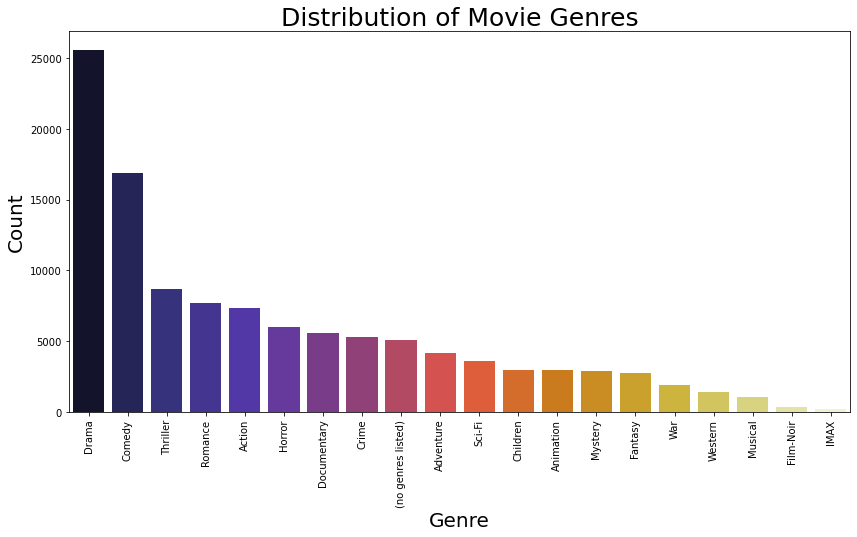

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

### Word Clouds

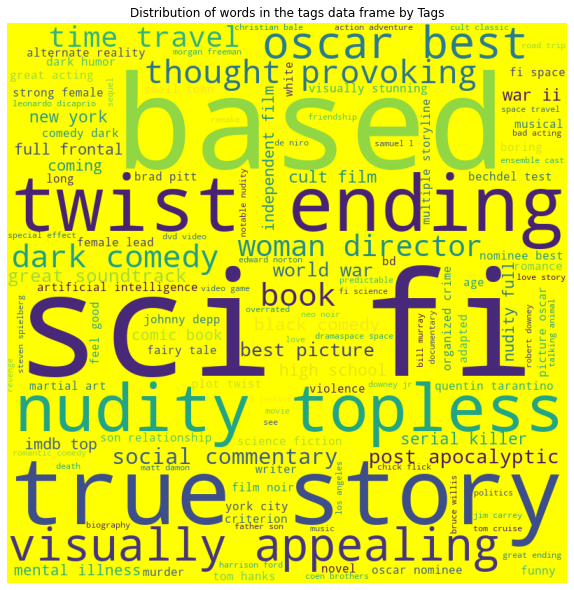

In [24]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tags_df['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=800, height=800,
                      background_color='yellow',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()


In [25]:
value_count = pd.DataFrame(tags_df['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)

In [26]:
value_count.head()

,genre,count
0,sci-fi,8330
1,atmospheric,6516
2,action,5907
3,comedy,5702
4,surreal,5326


### Publishing Years

In [27]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['Publish Year'] = dates


In [28]:
dates = []
for title in movies_df['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

movies_df['Publish Year'] = dates



In [29]:
len(movies_df)

62423

In [30]:
movies_df[movies_df['Publish Year'] == 9999].head()

,movieId,title,genres,Publish Year
15036,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,9999
18789,98063,Mona and the Time of Burning Love (Mona ja pal...,Drama,9999
25387,123619,Terrible Joe Moran,(no genres listed),9999
26284,125571,The Court-Martial of Jackie Robinson,(no genres listed),9999
26309,125632,In Our Garden,(no genres listed),9999


In [31]:
movies_df[(movies_df['Publish Year'] > 1888) &
          (movies_df['Publish Year'] < 2021)]

,movieId,title,genres,Publish Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
62418,209157,We (2018),Drama,2018
62419,209159,Window of the Soul (2001),Documentary,2001
62420,209163,Bad Poems (2018),Comedy|Drama,2018
62421,209169,A Girl Thing (2001),(no genres listed),2001


In [32]:
dataset = pd.DataFrame(movies_df['Publish Year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'Publish Year': 'count'},
               inplace=True)
dataset.head(50)

,year,count
0,2015,2513
1,2016,2488
2,2014,2406
3,2017,2374
4,2013,2173
5,2018,2034
6,2012,1978
7,2011,1838
8,2009,1724
9,2010,1691


In [33]:
# Plotting the Publish years
fig = px.bar(dataset, x=dataset['year'],
             y=dataset['count'],
             color=dataset['year'],
             title='Movies released per Publish Year')
fig.show()

### Modelling

In [34]:
# Below is the dataframe we will be altering.
working_train = train_df.drop(columns='timestamp')

In [35]:
df_work = working_train.set_index('movieId').join([movies_df[['movieId',
                                                           'genres']]
                                                   .set_index('movieId'),
                                                   imdb_df[['movieId',
                                                         'title_cast',
                                                         'director',
                                                         'plot_keywords']].
                                                   set_index('movieId')],
                                                  how='left').reset_index()
df_work.head()


,movieId,userId,rating,genres,title_cast,director,plot_keywords
0,1,158849,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,1,97203,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
2,1,161871,3.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
3,1,45117,4.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
4,1,27431,5.0,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation


In [36]:
def preprocessor_train(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imdb_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus', 'rating']]


In [37]:
def preprocessor_test(df):
    working_train = df.copy()

    # Merge
    df_work = working_train.set_index('movieId').join([movies_df
                                                       [['movieId', 'genres']].
                                                       set_index('movieId'),
                                                       imdb_df[['movieId',
                                                             'title_cast',
                                                             'director',
                                                             'plot_keywords']].
                                                       set_index('movieId')],
                                                      how='left').reset_index()

# '(no genre listed)' is an equivalent of a missing value in the column genres

    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [38]:
Test = preprocessor_test(test_df)

In [39]:
X = preprocessor_train(train_df.drop(columns=['timestamp'])) # DO NOT RUN THIS ON LOCAL COMPUTER


In [40]:
X1 = X.drop(columns=['rating', 'userId', 'movieId'])
T1 = Test.drop(columns=['userId', 'movieId'])


In [41]:
y = X['rating']

In [42]:
cv = CountVectorizer()
X_mat =cv.fit_transform(X1['corpus'])

In [43]:
Test_mat = cv.transform(T1['corpus'])

In [44]:
X_mat.shape

(10000038, 130227)

### Content Based Model(Linear Regression)

In [45]:
estimators2 = []
estimators2.append(('standardize',
                    StandardScaler(with_mean=False)))
estimators2.append(('mod',
                    LinearRegression()))
model = Pipeline(estimators2)
model.fit(X_mat, y)

Pipeline(steps=[('standardize', StandardScaler(with_mean=False)),
                ('mod', LinearRegression())])

In [46]:
preds = []
for _, row in test_df.iterrows():
    predict = list(model.predict(uid=row['userId'], iid=row['movieId']))
    preds.append(predict)

TypeError: predict() missing 1 required positional argument: 'X'

In [47]:
ratings = []
for i in preds:
    prediction = i[3]
    ratings.append(prediction)

In [48]:
submission = sample.copy()
sub['rating'] = ratings
sub.head()

NameError: name 'sample' is not defined